### Objective to predict the survival of passenger in titanic

In [13]:
#import the dataset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#import required libraries for accuracy matrix calcuation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_curve

ds_train = pd.read_csv('/train.csv')
ds_test = pd.read_csv('/test.csv')

In [14]:
#Create copy of the test data set which will be needed for submission purpose
ds_test_copy = ds_test.copy(deep=True)

In [15]:
#get train data information so that we can find missing data and datatypes
print(ds_train.info())
print('-'*10)
print(ds_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           41

In [16]:
#find the total number of null value rows for each column
print(ds_train.isnull().sum())
print(ds_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [17]:
#combine both the train and test data sets so that we can do modification in data set and feature scalling consistently for both data sets
dataset = [ds_train, ds_test]

In [18]:
#Need to preprocess the data.
#Here we can see that some of the records in train data sets for column Age, Cabin and Embarked don't have data
#Like wise test data set also don't have the data  
#Need to replace null values with some placeholder
#We will be using median of Age and Fare to fill the empty data
for dset in dataset:
    dset['Age'].fillna(dset['Age'].median(), inplace=True)
    dset['Fare'].fillna(dset['Fare'].mode()[0], inplace=True)
    dset['Embarked'].fillna(dset['Embarked'].mode()[0], inplace=True)

In [19]:

#Do feature scalling for test and train data.
# We will be creating new features based on the existing feature.
#1. Title:  Create title from name present in both data sets
#2. Cabin_assigned: We can see that some of the passenger assigned with cabins whereas other don't have cabin assign to them
    #So here cabin could be an important point to find the survival of the passenger. Check the existence of the cabin for a given passenger
#3. Age_Cat: From the dataset we can see that Age is scattered from 0.4 to 80 years. We will be categorizing age in to bin of 4
#4. Fare_Cat: We are categorizing fare again in to different 4 categories
#5. Familly_Size: Familly size will include the passengers sibling, spouse, parents and passenger himself
#As we can see that there is Title present in name, let's create a new feature Title from saluation present in name attribute
for dset in dataset:
    dset['Title'] = dset.Name.str.split(',', expand=True)[1].str.split('.', expand=True)[0]
    dset['Cabin_assigned'] = ~dset.Cabin.isnull()
    dset['Age_Cat'] = pd.qcut(dset.Age, q = 4, labels = False)
    dset['Fare_Cat'] = pd.qcut(dset.Fare, q = 4, labels = False)
    dset['Familly_Size'] = dset.SibSp + dset.Parch + 1

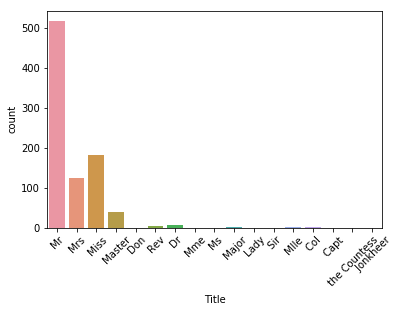

In [20]:
#Plot all available title in data 
sns.countplot(x='Title', data = ds_train)
plt.xticks(rotation=45);

In [21]:
#From above graph we can see that there are Titles like Mme, Major, Lady etc. We will be merging all those titles to single title as Special
ds_train['Title'].replace({'Mlle':'Miss', 'Mme': 'Mrs', 'Ms':'Miss'}, inplace=True, regex=True)
ds_train['Title'].replace(['Don','Dona', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer'], 'Special', inplace=True, regex=True)
ds_test['Title'].replace({'Mlle':'Miss', 'Mme': 'Mrs', 'Ms':'Miss'}, inplace=True, regex=True)
ds_test['Title'].replace(['Don','Dona', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer', 'Speciala'], 'Special', inplace=True, regex=True)


In [22]:
#Since there are some of the column which we don't need now like Name, Cabin, Age and Fare.
#The reason being we have derived new attributes from the above attributes
remove_attribute = ['Age', 'Fare', 'Cabin', 'Name', 'PassengerId', 'Ticket', 'SibSp', 'Parch']
ds_train = ds_train.drop(remove_attribute, axis = 1)
ds_test = ds_test.drop(remove_attribute, axis = 1)

In [23]:
#we will be trying out multiple learning models.
#below method is used to find the accuracy and precesion of the model 

"""
 Find the accuracy of the model
"""
def accuracy_score_method(y_test, y_predicted):
    cm = confusion_matrix(y_test, y_predicted)
    acc_socre = accuracy_score(y_test, y_predicted)
    prec_score = precision_score(y_test, y_predicted)
    roc_curve_value = roc_curve(y_test, y_predicted) 
    print("Confusion matrix %s", cm)
    print("accuracy score %s", acc_socre)
    print("precision score %s", prec_score)
    print("roc curve %s", roc_curve_value)

In [ ]:
#We have already done featuer scalling which includes features like Title, which has number of values like Mr., Mrs. etc.
#Here we will be encoding features like Gendre, Title, etc.
#Transforming data into binary variables
ds_train = pd.get_dummies(ds_train, drop_first=True)
ds_test = pd.get_dummies(ds_test, drop_first=True)

In [ ]:
#Create dependent and independent variables from training data sets
X = ds_train.iloc[:,1:]
y = ds_train.iloc[:,0]

In [ ]:
#Split dataset into train and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
#Create different models and check the result one by one.

#Start with Support Vector Machine SVC
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0, gamma=0.1)
classifier.fit(X_train, y_train)
svc_prediction = classifier.predict(X_test)
accuracy_score_method(y_test, svc_prediction)

#GridSearch algo for parameter tunning for SVC

 #from sklearn.grid_search import GridSearchCV
 #svc_parameter = [ {"kernel":['rbf']}, {"gamma":[1e-1, 1e-2]}]
 #gridsearch = GridSearchCV(  classifier, param_grid = svc_parameter, cv=10)
 #gridsearch.fit(X_train, y_train)
 #print("Best parameters %s", gridsearch.best_params_)
 #print("Best score %s", gridsearch.best_score_)

In [ ]:

#Compute with RandomForest Tree classification
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier( n_estimators = 10, max_depth=6)
rf_classifier.fit(X_train, y_train)
rf_prediction = rf_classifier.predict(X_test)
accuracy_score_method(y_test, rf_prediction)

#GridSearch algo for parameter tunning for RandomeForest

#rf_parameter = [ {"n_estimators":[10,100,1000]}, {"max_depth":[1,3,5,6,7,10,100]}]
#gridsearch = GridSearchCV(  rf_classifier, param_grid = rf_parameter, cv=10)
#gridsearch.fit(X_train, y_train)
#print("Best parameters %s", gridsearch.best_params_)
#print("Best score %s", gridsearch.best_score_)

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0)
logistic_regression.fit(X_train, y_train)
logistic_prediction = logistic_regression.predict(X_test)
accuracy_score_method(y_test, logistic_prediction)

In [ ]:
#SGDClassifier
from sklearn.linear_model import SGDClassifier
sgdClassifier = SGDClassifier(penalty='elasticnet')
sgdClassifier.fit(X_train, y_train)
sgd_prediction = sgdClassifier.predict(X_test)
accuracy_score_method(y_test, sgd_prediction)

In [ ]:
#Ensemble learning which combines all the algoritham
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators=[('lr', logistic_regression), ('rf', rf_classifier), ('svc', classifier)], voting='hard')
voting_classifier.fit(X_train, y_train)
voting_prediction = voting_classifier.predict(X_test)
accuracy_score_method(y_test, voting_prediction)

In [ ]:
#Predict the final result to be submitted to Kaggal
ds_predict = classifier.predict(ds_test)    


In [ ]:
#prepare the submission.csv for kaggle
ds_test_copy['Survived'] = ds_predict
ds_test_copy[['PassengerId', 'Survived']].to_csv('SUBMISSION.csv', index=False)
